<a href="https://colab.research.google.com/github/sudhanshu99/US-House-Price-Prediction/blob/main/US_House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Prices prediction**

**Importing python libraries**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Loading CSV into data frame**

In [ ]:
# Train set DataFrame
train_df = pd.read_csv('house_train.csv')
# Test set DataFrame
test_df = pd.read_csv('house_test.csv')

In [ ]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,30,RL,63.0,13907,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1940,1969,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,290,Unf,0,706,996,GasA,...,Y,SBrkr,996,0,0,996,1,0,1,0,3,1,TA,6,Typ,1,Gd,NaN,NaN,NaN,0,0,NaN,NaN,Y,144,0,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,108000
1,1,50,RL,78.0,11344,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1.5Fin,5,5,1958,1958,Gable,CompShg,MetalSd,MetalSd,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,BLQ,460,Unf,0,414,874,GasW,...,Y,FuseA,874,650,0,1524,0,0,1,1,3,1,TA,7,Typ,0,NaN,Attchd,1958.0,Unf,1,315,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,144000
2,2,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
3,3,190,RM,60.0,11340,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,6,1885,1950,Gable,CompShg,VinylSd,AsbShng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,777,777,GasA,...,Y,SBrkr,1246,1044,0,2290,0,0,2,0,4,2,TA,11,Typ,0,NaN,Detchd,1971.0,Unf,2,560,TA,TA,N,0,0,114,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,122500
4,4,60,RL,76.0,9591,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,344.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1143,1143,GasA,...,Y,SBrkr,1143,1330,0,2473,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2004.0,RFn,3,852,TA,TA,Y,192,151,0,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal,317000


In [ ]:
print(len(train_df.columns))
train_df.columns

81


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# Test set data summary
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,583.500000,57.251712,70.092668,10571.564212,6.106164,5.624144,1970.900685,1984.759418,104.009475,437.525685,44.419521,571.046233,1052.991438,1159.699486,347.994863,6.411815,1514.106164,0.412671,0.063356,1.563356,0.379281,2.871575,1.050514,6.511130,0.613870,1978.067090,1.760274,469.684075,94.175514,46.369863,22.380137,2.880993,16.201199,1.342466,45.542808,6.357877,2007.797945,180657.954623
std,337.316864,42.189213,22.680648,10543.102521,1.356326,1.129946,30.138647,20.782577,180.590246,455.613166,154.643046,442.216565,434.697436,383.032984,437.325344,51.781451,524.379961,0.519617,0.250640,0.554881,0.504460,0.822111,0.230531,1.629278,0.649867,24.245938,0.747963,213.714371,124.439546,65.718768,61.711808,24.712303,57.452784,26.543444,545.527199,2.679448,1.328069,77261.558314
min,0.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,372.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,291.750000,20.000000,60.000000,7487.250000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,224.000000,798.000000,879.750000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,323.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,583.500000,50.000000,70.092668,9355.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,377.500000,0.000000,484.500000,980.000000,1080.000000,0.000000,0.000000,1470.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.067090,2.000000,475.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163500.000000
75%,875.250000,70.000000,79.000000,11530.000000,7.000000,6.000000,2000.250000,2004.000000,166.250000,699.250000,0.000000,812.250000,1300.500000,1389.500000,730.500000,0.000000,1771.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213000.000000
max,1167.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,1127.000000,2336.000000,6110.000000,4692.000000,1872.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,320.000000,480.000000,576.000000,15500.000000,12.000000,2010.000000,755000.000000


Numerical and Categorical features

In [ ]:
numerical_features = train_df.dtypes[train_df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))

categorical_features = train_df.dtypes[train_df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))

Number of Numerical features:  38
Number of Categorical features:  43


In [ ]:
train_df[numerical_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,30,63.0,13907,5,6,1940,1969,0.0,290,0,706,996,996,0,0,996,1,0,1,0,3,1,6,1,NaN,0,0,144,0,0,0,0,0,0,7,2008,108000
1,1,50,78.0,11344,5,5,1958,1958,180.0,460,0,414,874,874,650,0,1524,0,0,1,1,3,1,7,0,1958.0,1,315,0,0,0,0,0,0,0,7,2007,144000
2,2,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
3,3,190,60.0,11340,4,6,1885,1950,0.0,0,0,777,777,1246,1044,0,2290,0,0,2,0,4,2,11,0,1971.0,2,560,0,0,114,0,0,0,0,4,2010,122500
4,4,60,76.0,9591,8,5,2004,2005,344.0,0,0,1143,1143,1143,1330,0,2473,0,0,2,1,4,1,9,1,2004.0,3,852,192,151,0,0,0,0,0,10,2007,317000


Checking null values in each columns in train set

In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
total.head(25)

PoolQC          1165
MiscFeature     1128
Alley           1094
Fence            946
FireplaceQu      554
LotFrontage      186
GarageType        65
GarageCond        65
GarageYrBlt       65
GarageFinish      65
GarageQual        65
BsmtExposure      34
BsmtFinType1      33
BsmtCond          33
BsmtQual          33
BsmtFinType2      33
MasVnrArea         7
MasVnrType         7
Exterior2nd        0
Exterior1st        0
OverallCond        0
ExterQual          0
ExterCond          0
Foundation         0
RoofMatl           0
dtype: int64

## **Data Cleaning**

For a few columns there is lots of NaN entries.
But after reading the data description we find these are not missing data:
For PoolQC, NaN is not missing data but means no pool same goes for Fence, FireplaceQu etc.

In [ ]:
# columns where NaN values have meaning e.g. no pool etc.
non_dropping_cols = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']
# replace 'NaN' with 'None' in these columns
for col in non_dropping_cols:
    train_df[col].fillna('None',inplace=True)
    test_df[col].fillna('None',inplace=True)

Checking null values in each columns in train set after replacing NaN with None




In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
total.head(10)

LotFrontage    186
GarageYrBlt     65
MasVnrArea       7
SalePrice        0
ExterCond        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
dtype: int64

Replacing NaN with mean value of the column for the remaining columns: LotFrontage, GarageYrBlt, MasVnrArea

In [ ]:
# Replacing NaN with mean in Train set
train_df.fillna(train_df.mean(), inplace=True)
# Replacing NaN with mean in Test set
test_df.fillna(test_df.mean(), inplace=True)

In [ ]:
# Checking for null values after data cleaning
total = train_df.isnull().sum().sort_values(ascending=False)
total.head(10)

SalePrice      0
Heating        0
RoofStyle      0
RoofMatl       0
Exterior1st    0
Exterior2nd    0
MasVnrType     0
MasVnrArea     0
ExterQual      0
ExterCond      0
dtype: int64

## **EDA**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


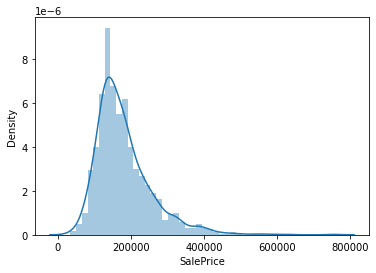

In [ ]:
# Histogram plot of SalesPrice
sns.distplot(train_df['SalePrice'])

**Corelation Matrix**

Correlation with all the features

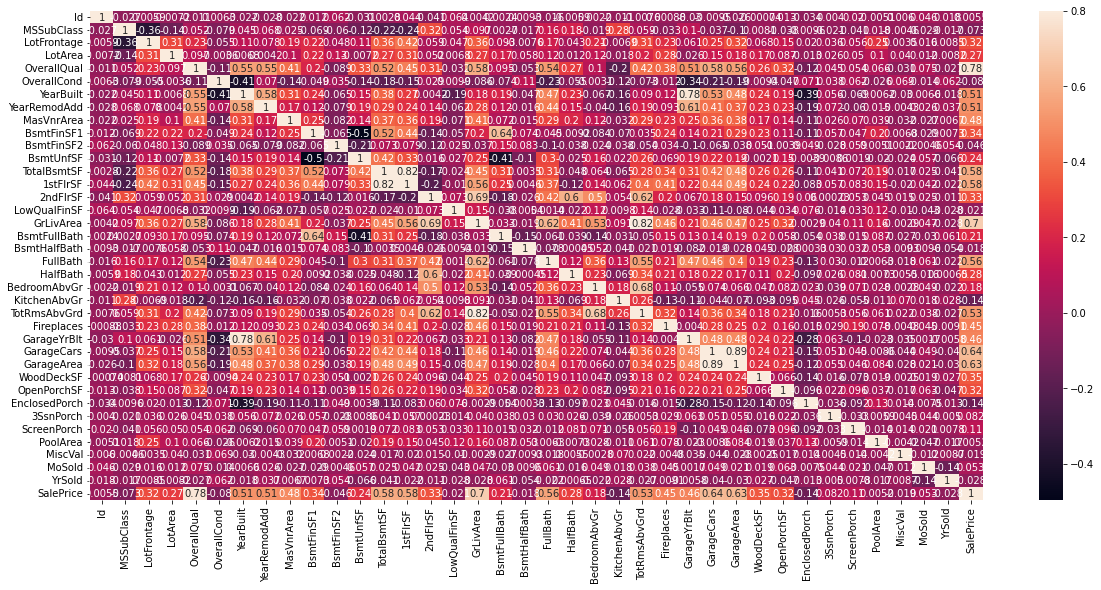

In [ ]:
corr_mat = train_df.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr_mat, vmax=.8, annot=True)

Features having high correlation with SalesPrice

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

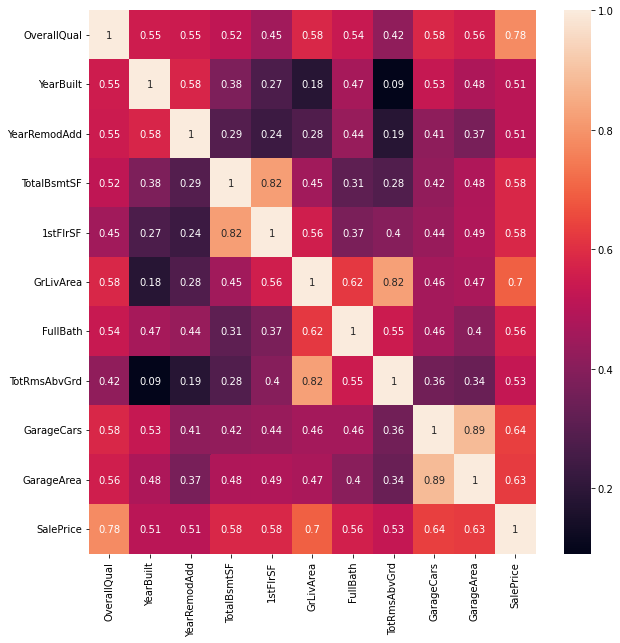

In [ ]:
corr_mat = train_df.corr()
top_corr_features = corr_mat.index[abs(corr_mat['SalePrice'])>0.5]
plt.figure(figsize=(10,10))
sns.heatmap(train_df[top_corr_features].corr(),annot = True);
top_corr_features

**Conclusion** : OverallQual is highly correlated with target feature SalePrice 0.79

**The relationship between SalesPrice and other high correlation variables**




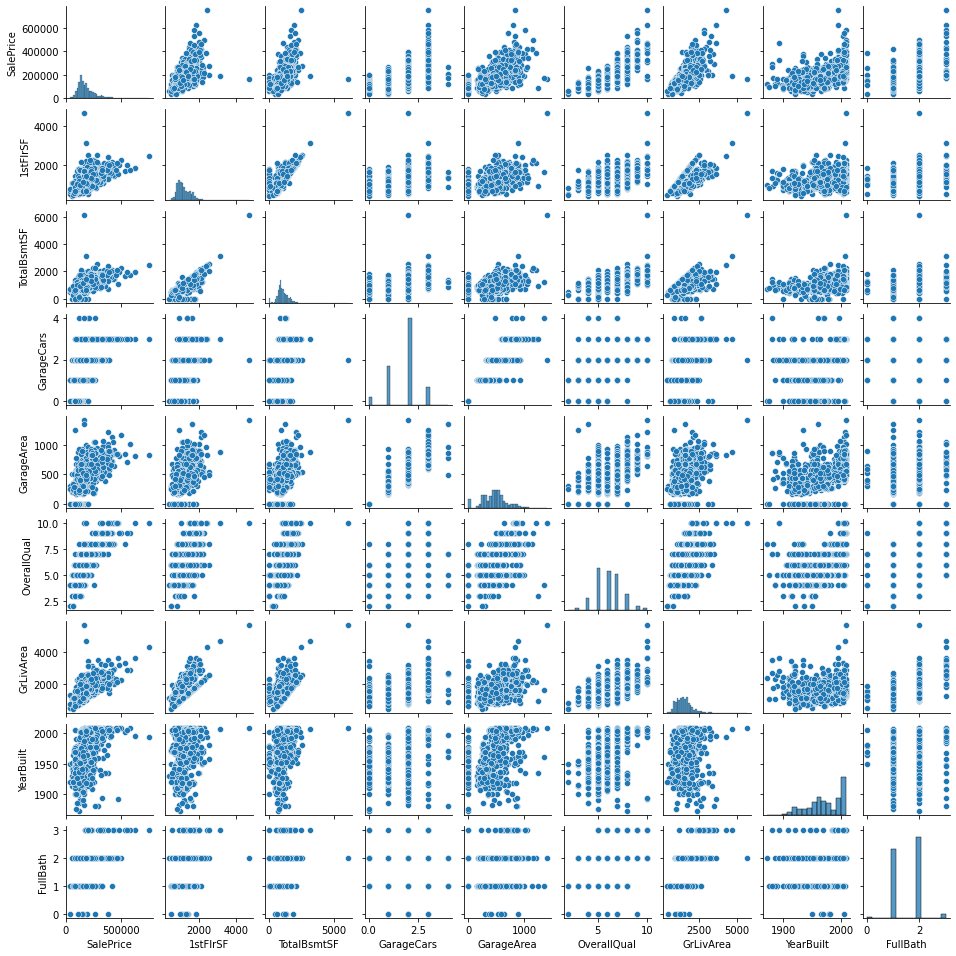

In [ ]:
visualization_columns = ['SalePrice', '1stFlrSF','TotalBsmtSF','GarageCars','GarageArea','OverallQual','GrLivArea','YearBuilt','FullBath']
sns.pairplot(train_df[visualization_columns], height=1.5)

In [ ]:
train_df[visualization_columns].dtypes

SalePrice      int64
1stFlrSF       int64
TotalBsmtSF    int64
GarageCars     int64
GarageArea     int64
OverallQual    int64
GrLivArea      int64
YearBuilt      int64
FullBath       int64
dtype: object

## **Modelling**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math

In [ ]:
#split the data to train the model 
Y = train_df['SalePrice']

feature_columns = ['1stFlrSF','TotalBsmtSF','GarageCars','GarageArea','OverallQual','GrLivArea','YearBuilt','FullBath']
train = train_df[feature_columns] 

X_train,X_test,Y_train,Y_test = train_test_split(train,Y,test_size = 0.3,random_state=0)


Training model with Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Root Mean Square Value

In [ ]:
train_prediction = reg.predict(X_test)
print("ROOT MEAN SQUARED ERROR : ",math.sqrt(sum((Y_test-train_prediction)**2)/len(Y_test)))

ROOT MEAN SQUARED ERROR :  38678.84674975501


Plotting Regression on the grapth

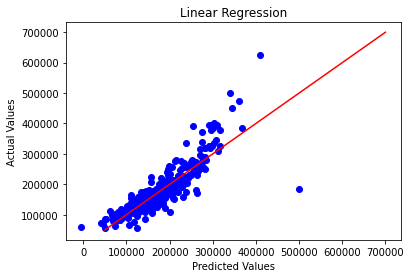

In [ ]:
plt.scatter(train_prediction,Y_test,color='blue')
plt.title('Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.plot([50000,700000],[50000,700000],c='red')
plt.show()

### **Sales** **Prediction** **bold text**

In [ ]:
# Predicting sales data on feature_columns of Test data
prediction = reg.predict(test_df[feature_columns])

In [ ]:
final_predicted_df = pd.DataFrame({'Id':test_df['Id'],'SalePrice':prediction})
final_predicted_df.to_csv('submission1.csv', index=False)